In [3]:
import feather
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [9]:
train = feather.read_dataframe('../data/interim/train.ftr')
test = feather.read_dataframe('../data/interim/test.ftr')
train["target"] = np.log1p(train['totals.transactionRevenue'].fillna(0).astype('float').values)
train.shape, test.shape

((903653, 56), (804684, 53))

### セッションレベルの予測結果を調査する

In [41]:
pred_results = np.load('../data/interim/pred_session_output_0.npz')
oof_preds = pred_results["oof_preds"]
sub_preds = np.log1p(pred_results["sub_preds"])
train["oof_preds"] = oof_preds
test["sub_preds"] = sub_preds
oof_preds.shape, sub_preds.shape

((903653,), (804684,))

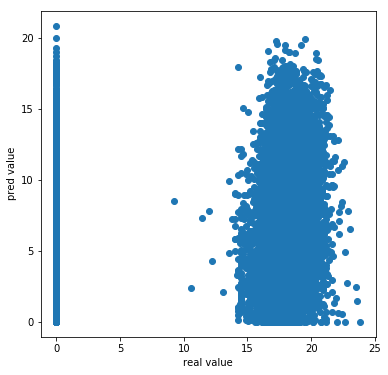

In [14]:
plt.figure(figsize=(6, 6))
plt.scatter(train["target"], train["oof_preds"])
plt.xlabel('real value')
plt.ylabel('pred value')
plt.show()

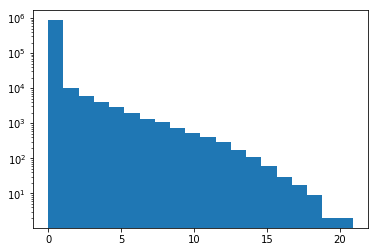

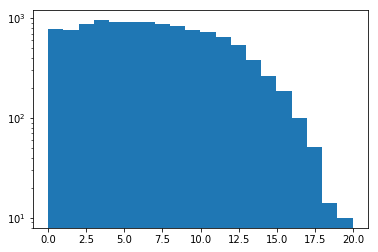

In [21]:
plt.hist(train[train["target"]==0]["oof_preds"], bins=20)
plt.yscale("log")
plt.show()
plt.hist(train[train["target"]!=0]["oof_preds"], bins=20)
plt.yscale("log")
plt.show()

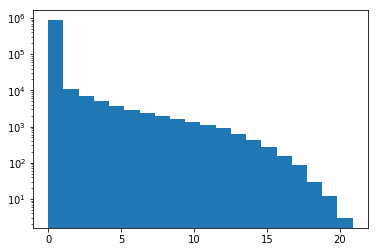

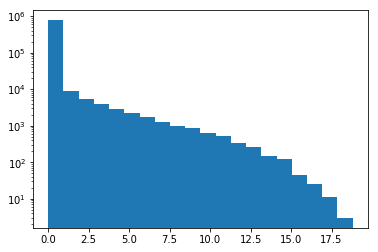

In [24]:
plt.hist(oof_preds, bins=20)
plt.yscale("log")
plt.show()
plt.hist(sub_preds, bins=20)
plt.yscale("log")
plt.show()

bouncesのpost processingを実行したらどうなる？

In [37]:
train_target_index = train[train['totals.bounces'].notnull()].index.copy()
test_target_index = test[test['totals.bounces'].notnull()].index.copy()

max: 1.9111452371517468


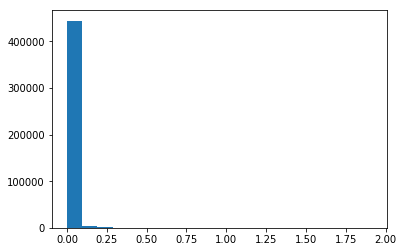

In [38]:
print("max:", train.loc[train_target_index, 'oof_preds'].max())
plt.hist(train.loc[train_target_index, 'oof_preds'], bins=20)
plt.show()

max: 1.2923841858117069


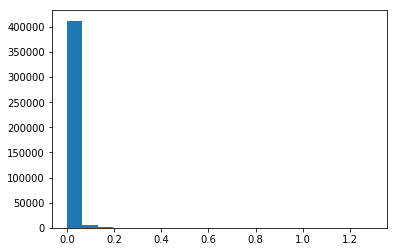

In [42]:
print("max:", test.loc[test_target_index, 'sub_preds'].max())
plt.hist(test.loc[test_target_index, 'sub_preds'], bins=20)
plt.show()